## Imports & Config

In [28]:
import torch
import yaml
from arcade_dataset import load_dataset, visualize_batch
import matplotlib.pyplot as plt
from model import VesselSegmentationModel

torch.cuda.empty_cache()

In [29]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [30]:
config = yaml.load(open('model_overfit_config.yaml', 'r'), Loader=yaml.FullLoader)

In [31]:
modalities, H_in, W_in = config['input']['image_shape']

## Model Definition

In [33]:
model = VesselSegmentationModel.load_from_checkpoint('/home/paperspace/DMI2024B/models/run_with_dice_bce/epoch=19-step=2500.ckpt')

## Overfit the model on a single batch

In [34]:
dataset = load_dataset(split='val')
next(iter(dataset)).keys()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=3, shuffle=True)

In [35]:
batch = next(iter(dataloader))

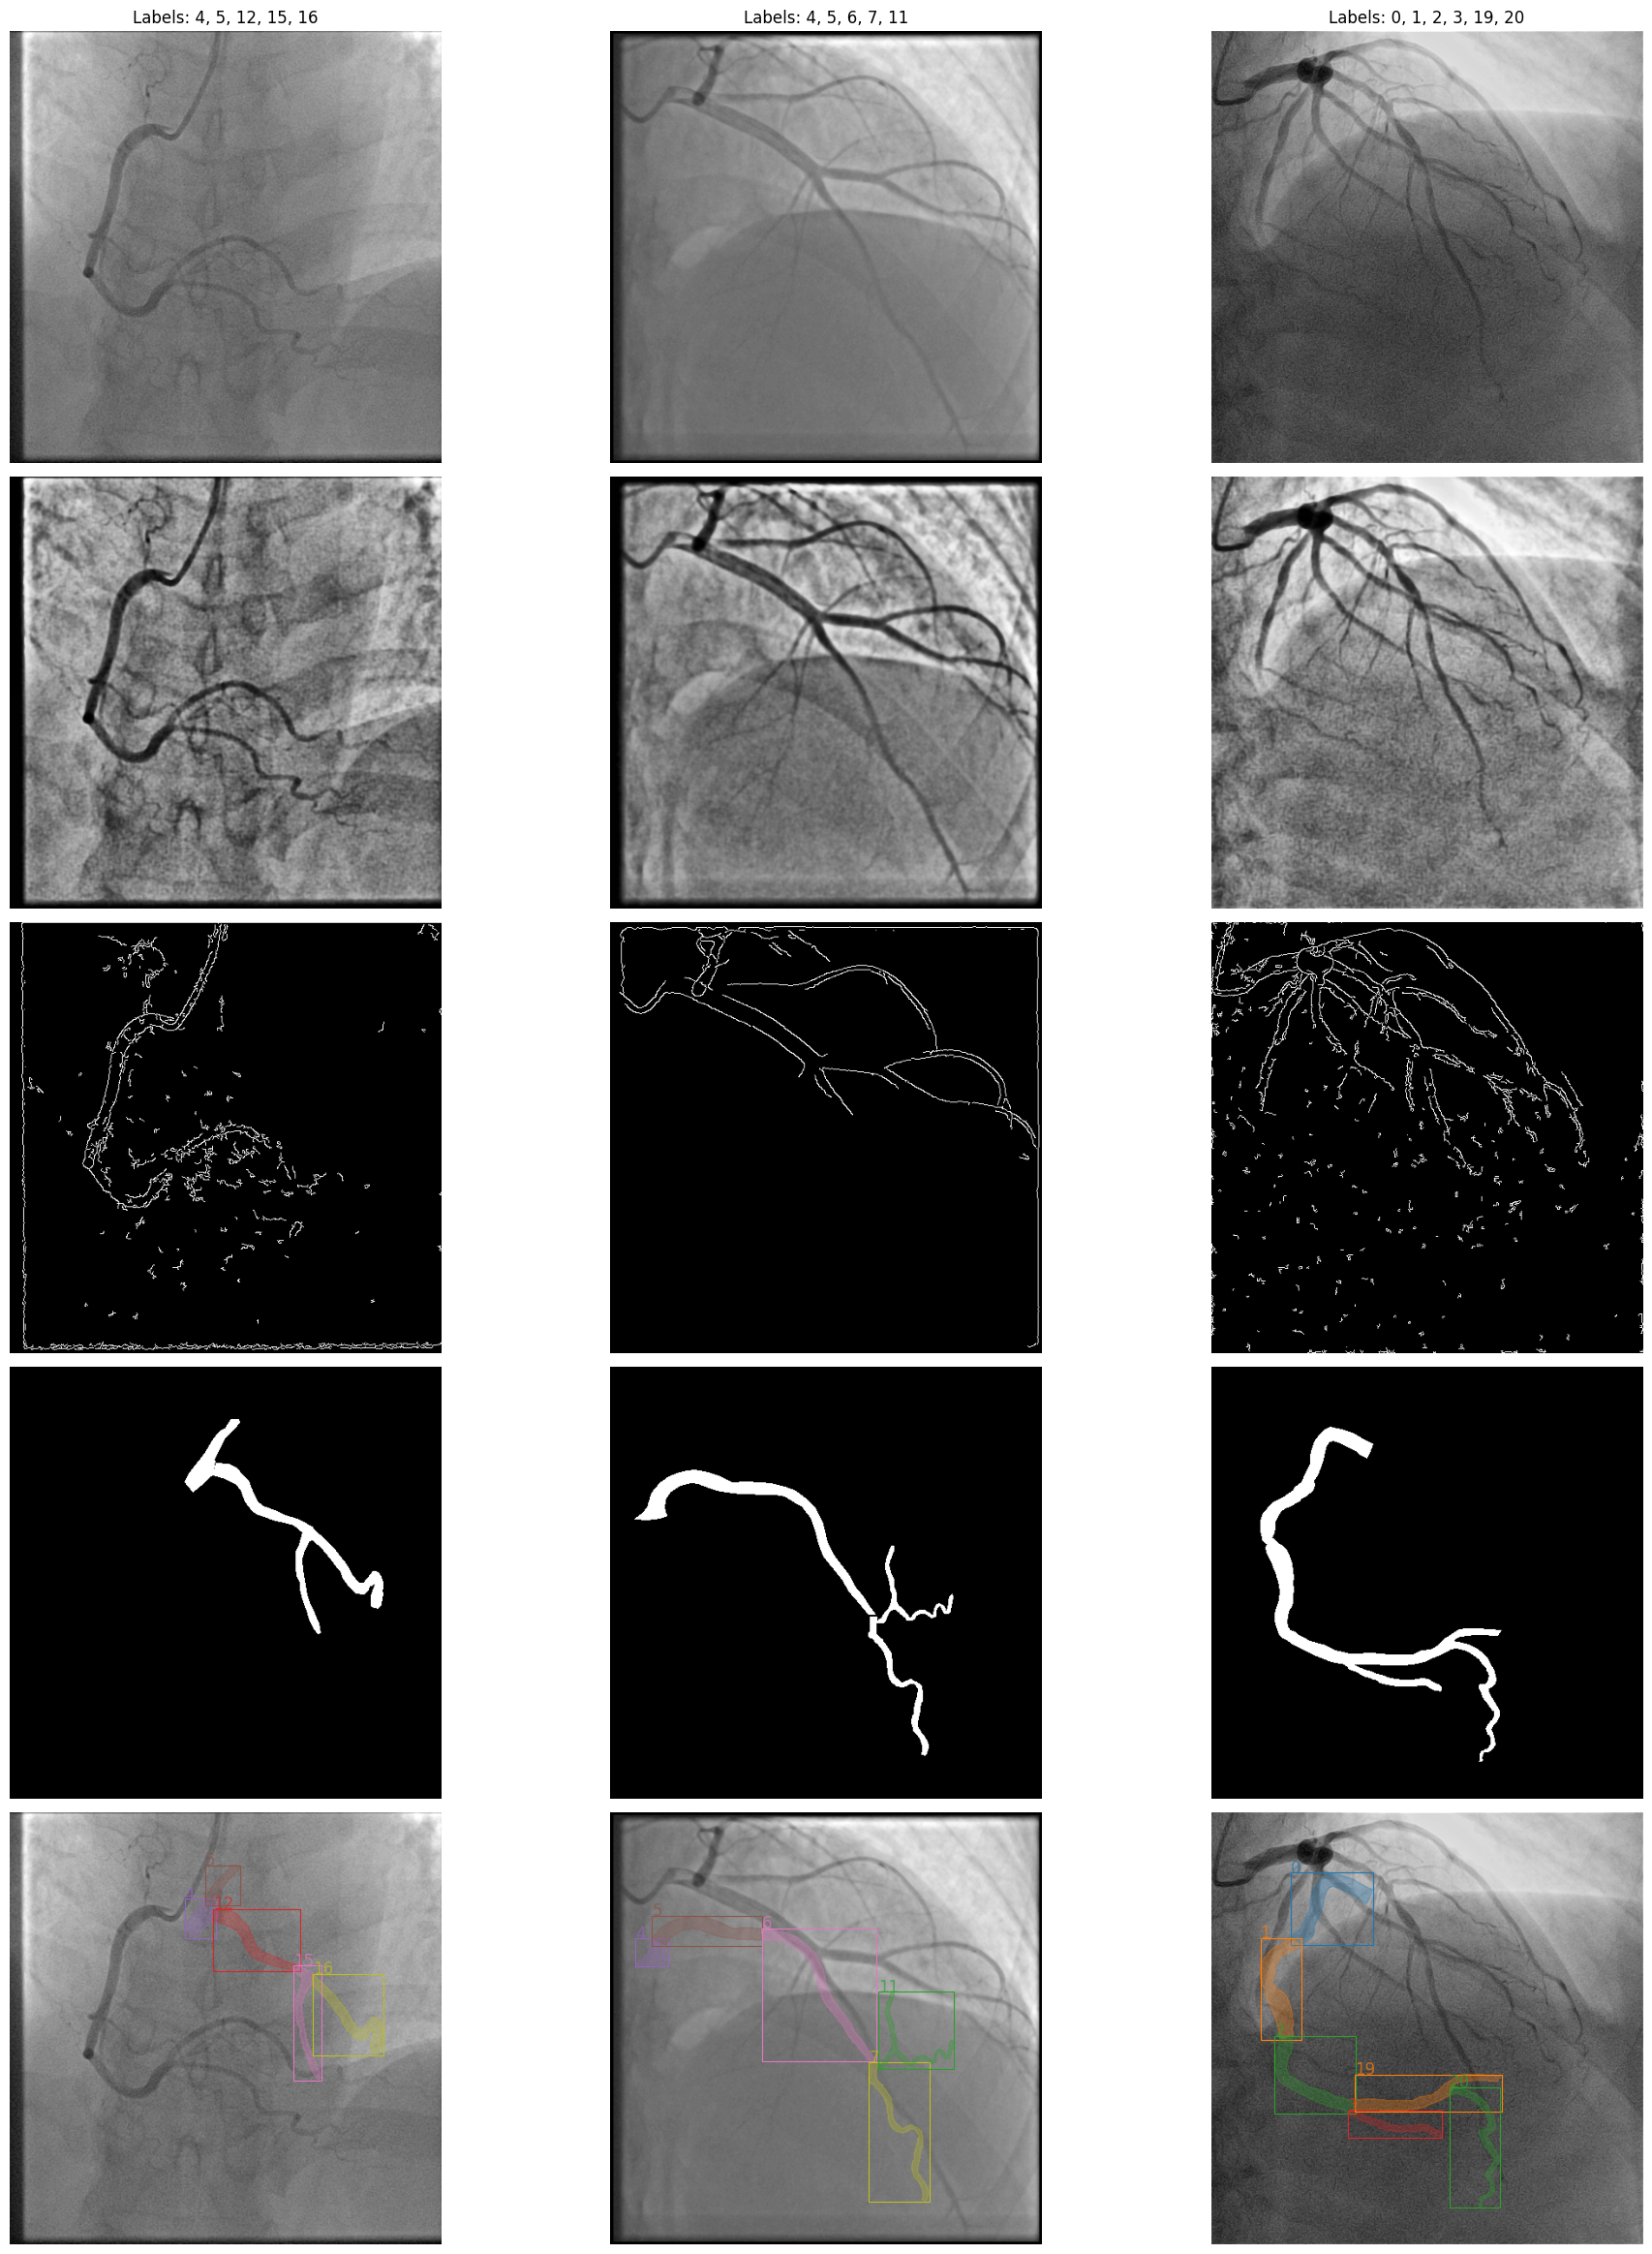

In [36]:
visualize_batch(batch, num_classes=25, num_images=3)

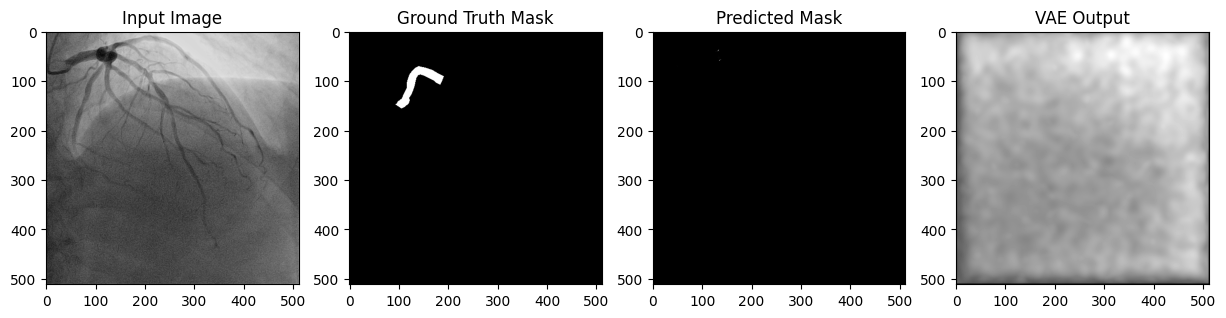

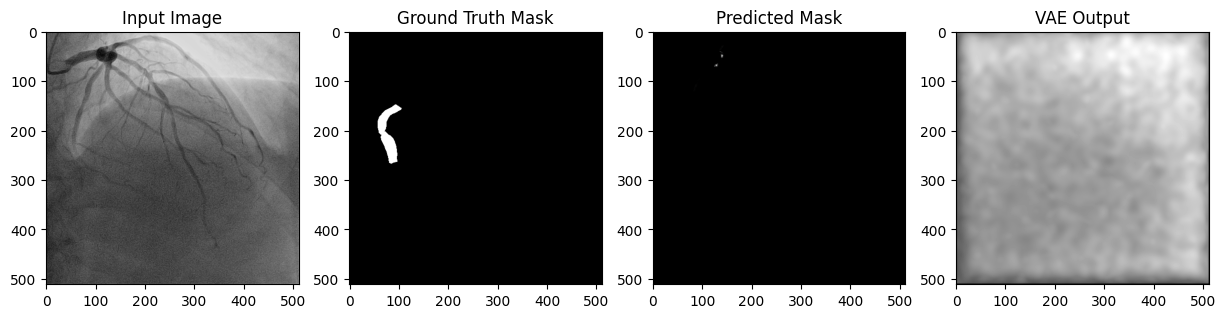

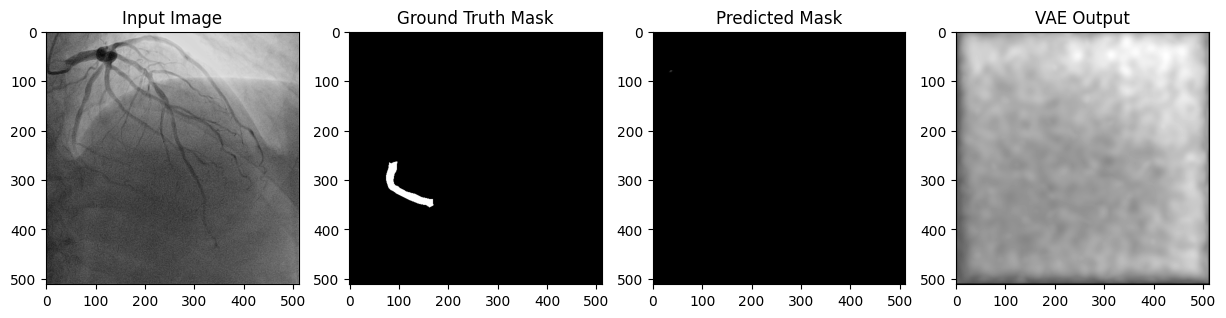

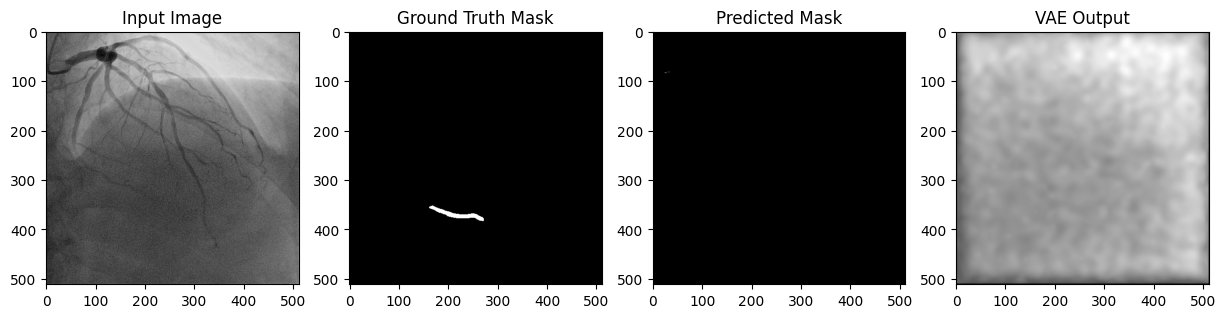

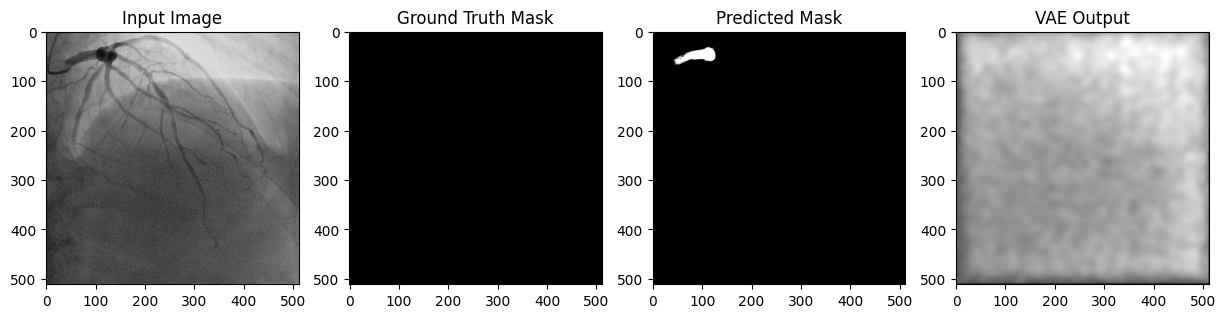

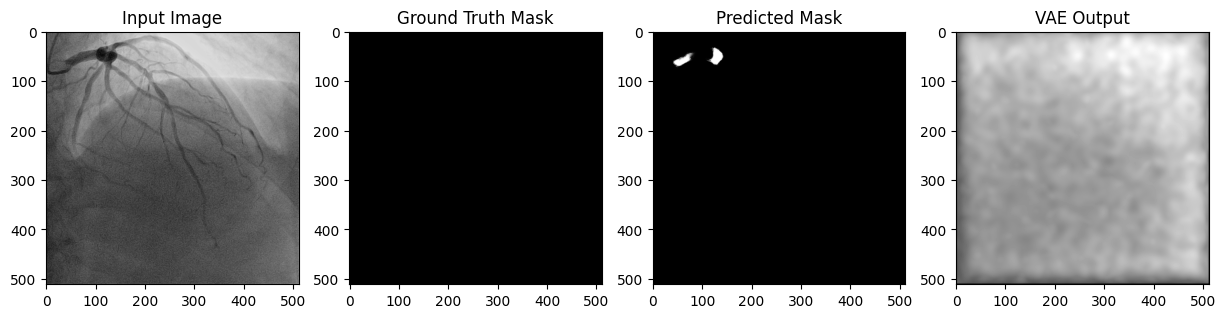

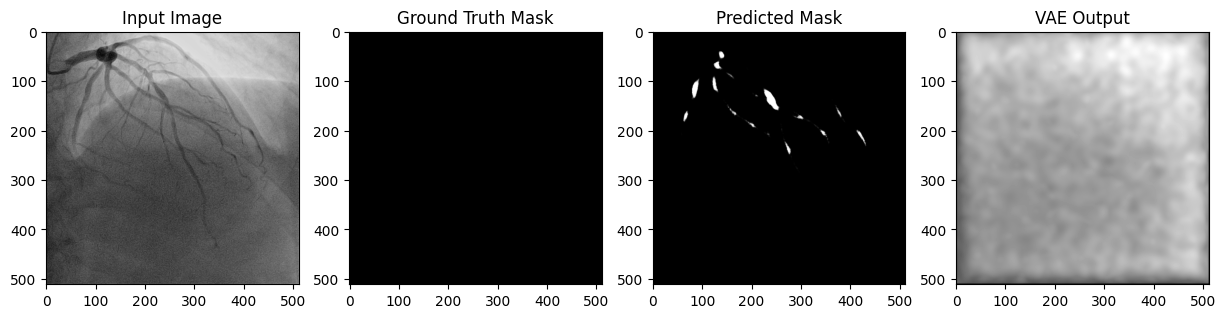

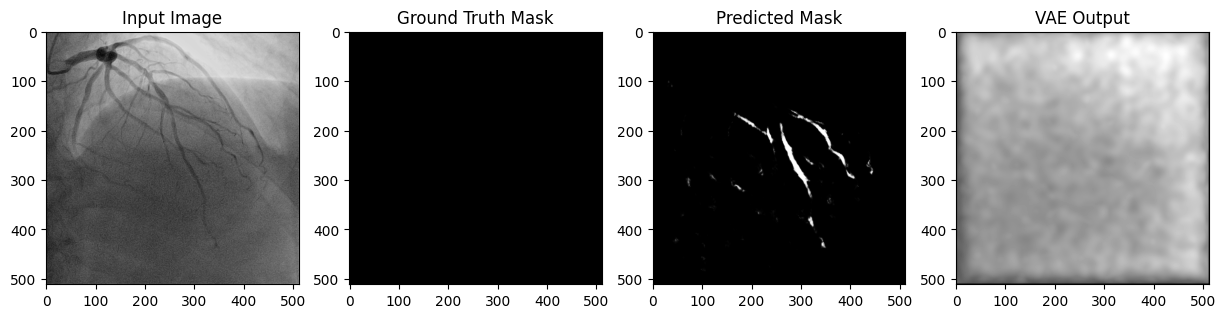

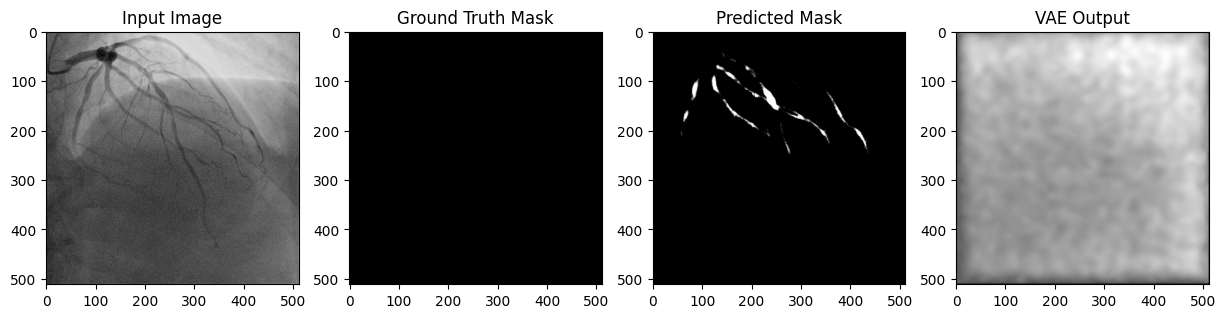

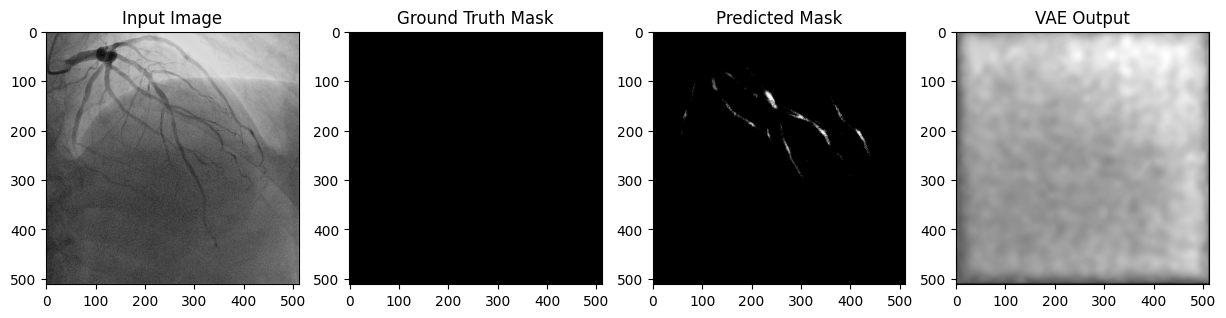

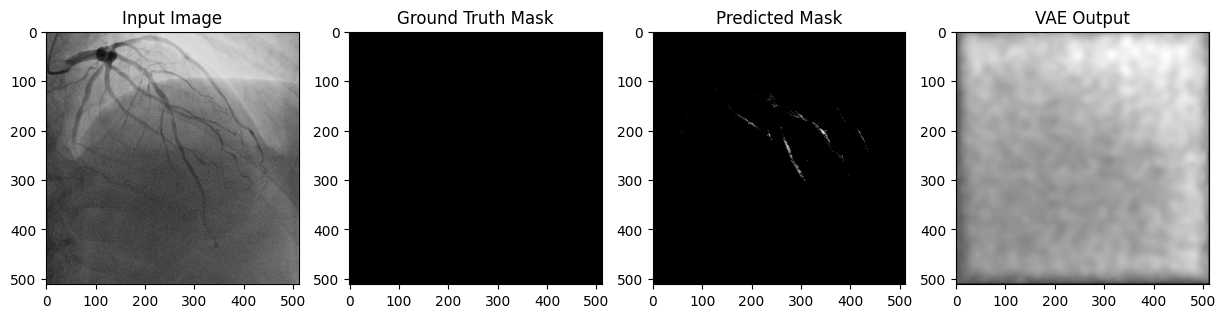

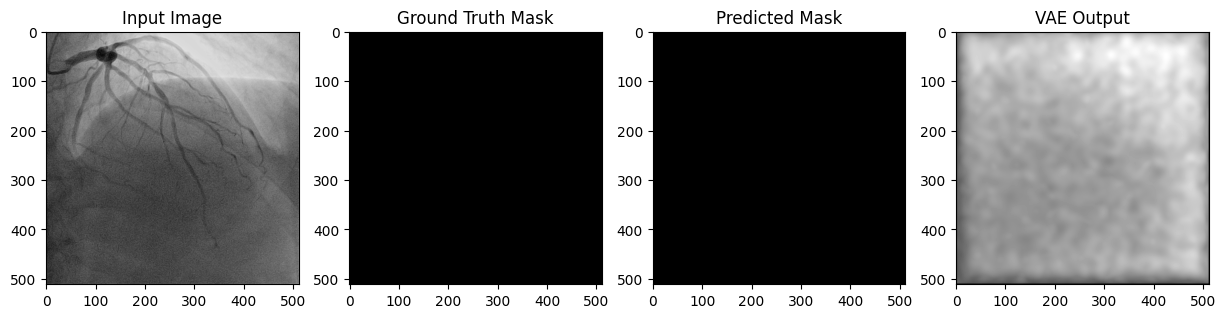

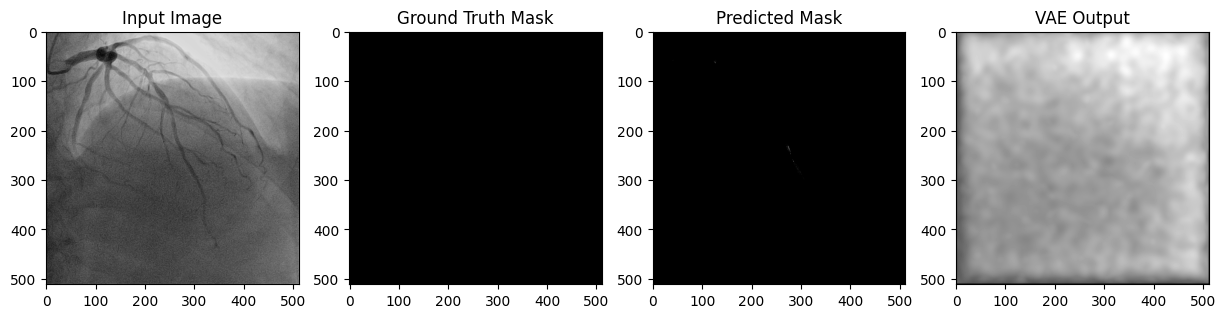

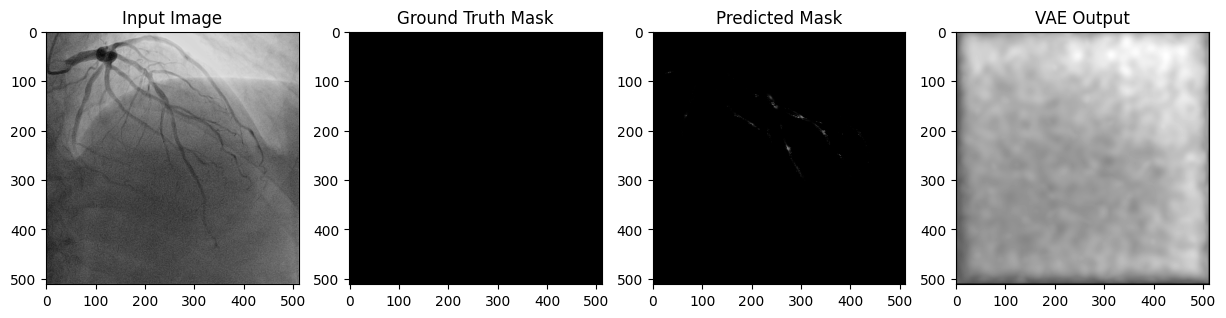

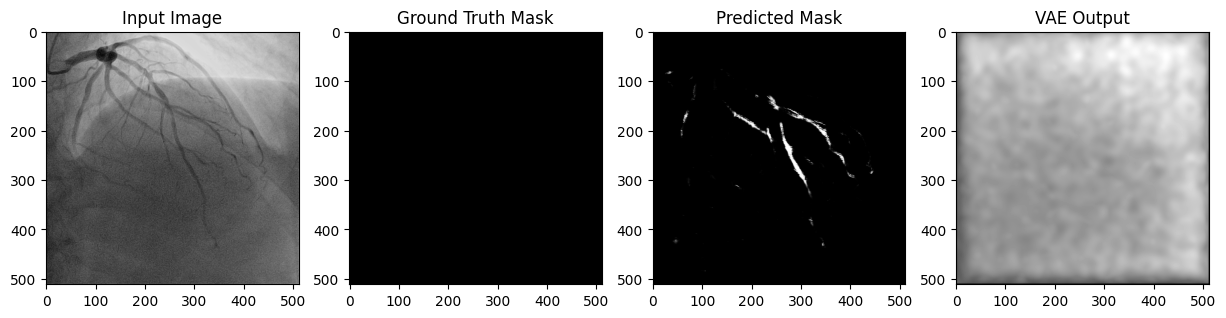

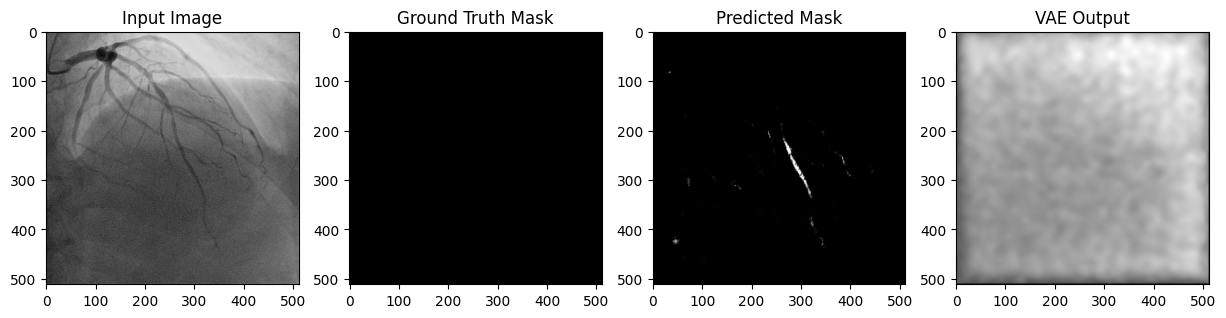

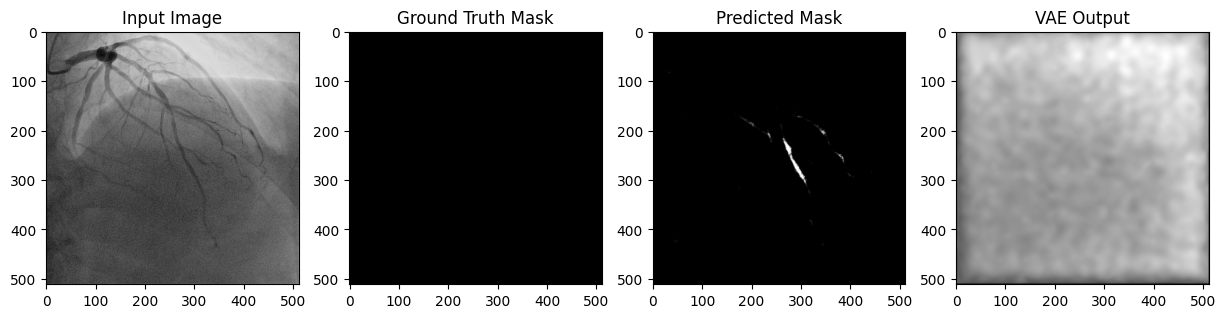

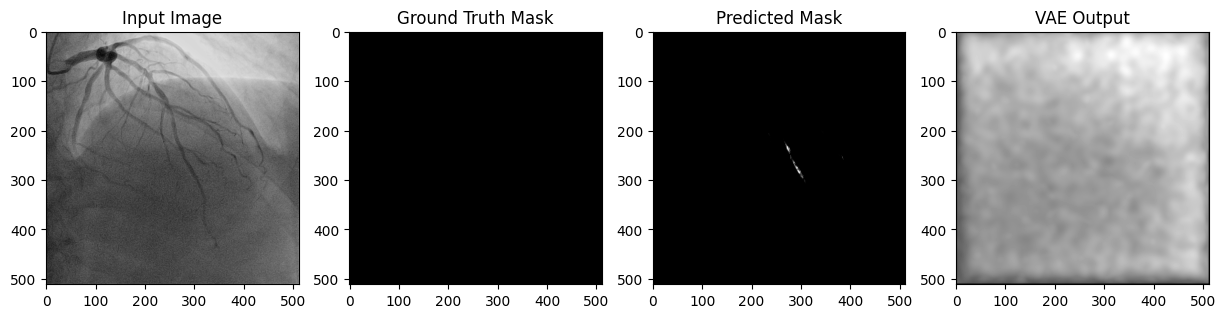

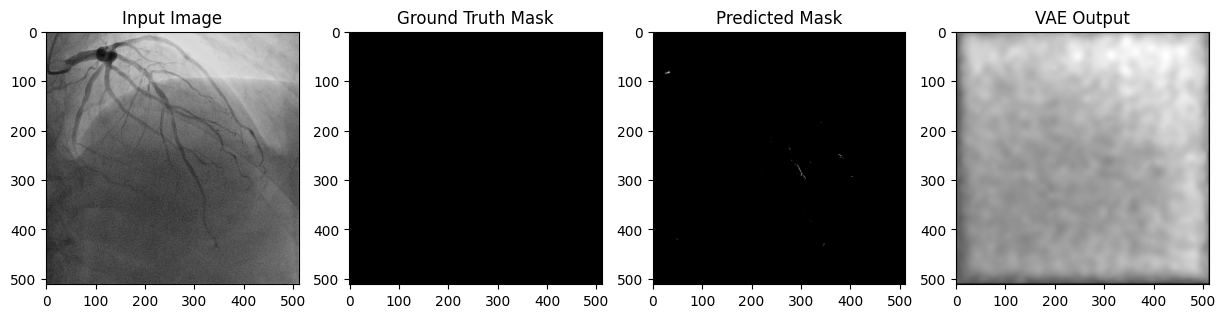

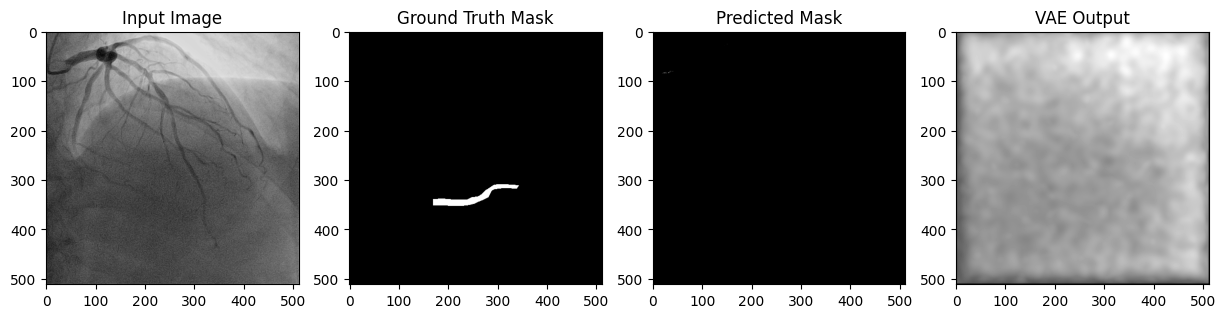

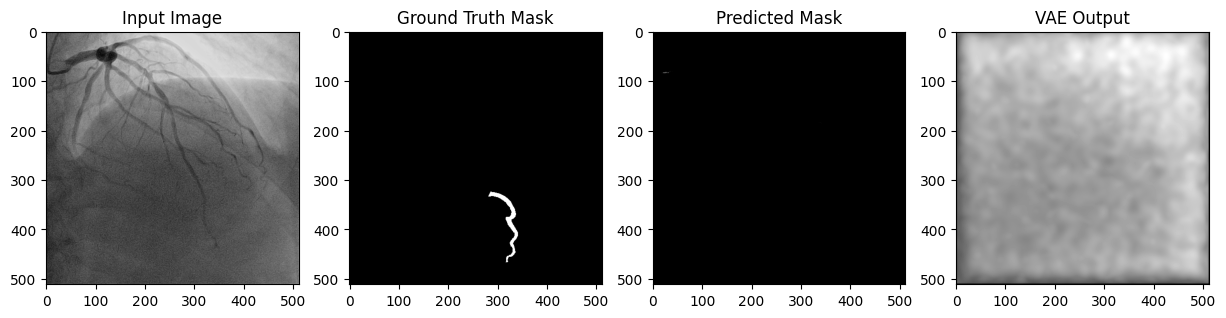

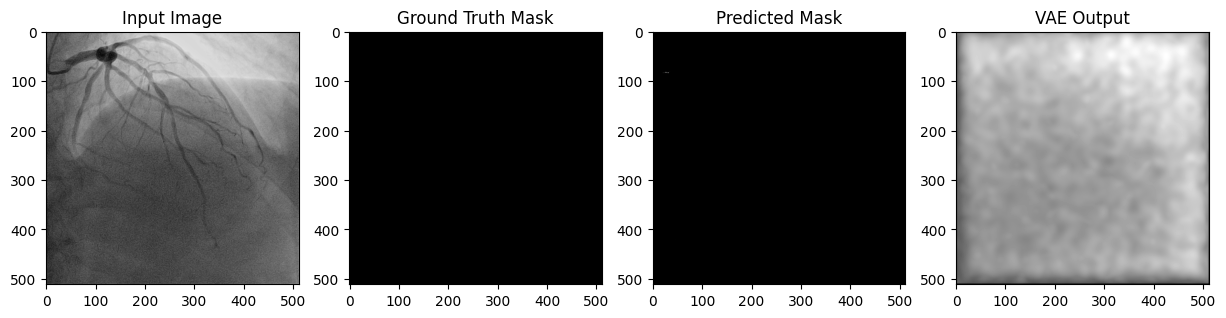

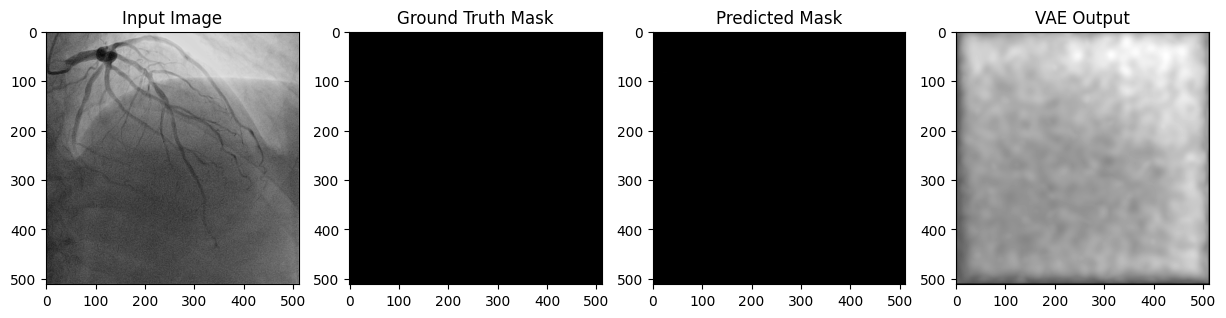

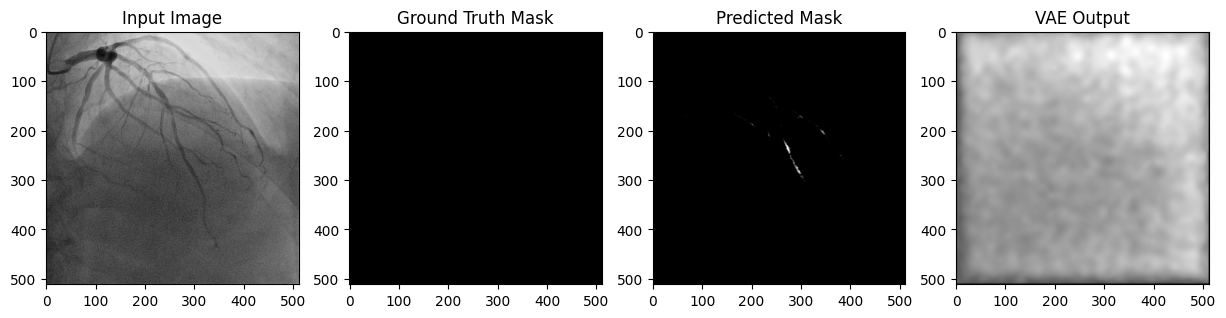

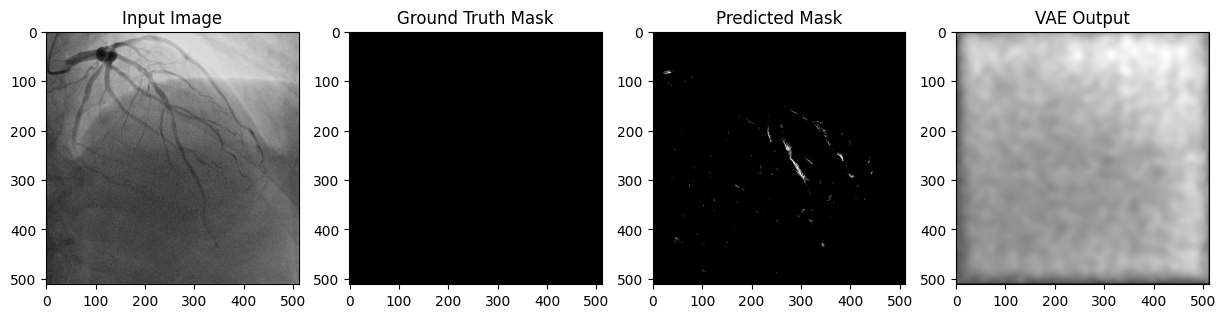

In [37]:
# Look at the output of the model
model.eval()
model.to(device)
x, y_gt = batch['transformed_image'], batch['separate_masks']
decoder_output, vae_output, _, labels, _ = model(x)
img = 2

for c in range(25):
    plt.subplots(figsize=(15, 5), ncols=4)
    plt.subplot(1, 4, 1)
    plt.imshow(x[img, 0, :, :].cpu().numpy(), cmap='gray')
    plt.title('Input Image')
    plt.subplot(1, 4, 2)
    plt.imshow(y_gt[img, c, :, :].cpu().numpy(), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.subplot(1, 4, 3)
    plt.imshow(decoder_output[img, c, :, :].detach().cpu().numpy(), cmap='gray')
    plt.title('Predicted Mask')
    plt.subplot(1, 4, 4)
    plt.imshow(vae_output[img, 0, :, :].detach().cpu().numpy(), cmap='gray')
    plt.title('VAE Output')
    plt.show()